In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('img/style.mplstyle')


def remove_failure(df):
    success = np.array(df['success'])
    print(np.sum(success) / len(df))
    return df[df['success']]


def read_simulations():
    q = []
    for i in range(10):
        df = pd.read_csv('data/sim_'+str(i)+'_0.csv').sort_values('logB', ascending=False)
        df = remove_failure(df)
        q.append(np.array(df['logB']))
    
    # because of failure removal, not all arrays have the same length, let's enforce that
    lenn = np.min([len(qq) for qq in q])
    q = np.array([qq[:lenn] for qq in q])

    return np.sort(q, axis = 0)


In [2]:
scratch_base = '/pscratch/sd/j/jrobnik/'
scratch = scratch_base + 'quasars_scratch/'
dir_data = scratch_base + 'quasars/'
dir_results = 'data/'

ids = np.load(dir_data + 'ids.npy')

data = pd.read_csv('data/real_0_0.csv').sort_values('logB', ascending=False)
#data['log_post_odds'] = data['logB'] + data['log_prior_odds']
data1 = pd.read_csv('data/real_1_0.csv').sort_values('logB', ascending=False)
#data1['log_post_odds'] = data1['logB'] + data1['log_prior_odds']

data_sim = read_simulations()

#data2 = pd.read_csv('data/real_2_0.csv').sort_valuessort_values('logB', ascending=False)


data = remove_failure(data)
data1 = remove_failure(data1)

info = pd.read_csv(dir_data + 'quasar_info.txt', delim_whitespace=True)
data = pd.merge(data, info, on= 'id')

0.9881298928864144
0.9879603199276489
0.9892886414379787
0.9884973009637397
0.9892321171183902
0.9876494361699121
0.9891473306390074
0.9879603199276489
0.9886951360822994
0.9879320577678546
0.9882712036853857
0.8075629539609417


In [13]:
idknown = np.array(pd.read_csv('quasars/from_paper.txt', comment= '#', header= None))[:, 0]

data[data['id'].isin(idknown)]

,logB,log_lik_ratio,white_periodogram,cycles,period,sigma,tau,A_const,A_sin,A_cos,success,data_points,T,log_prior_odds,id,redshift
198,10.225647,10.661214,23076.711879,2.328833,492.897515,0.081942,75.464433,17.781721,0.225609,0.265159,True,91,1147.875986,-2.489935,16357,0.308
254,9.718668,5.850742,3014.823218,2.624773,423.684126,0.139442,71.728010,20.093631,-0.523651,0.030869,True,53,1112.074571,-1.534502,343421,0.928
425,8.455731,9.763068,2268.107756,2.422055,456.998811,0.088206,379.507860,19.296743,0.121909,0.105280,True,68,1106.876075,1.595218,346171,0.886
749,7.147074,7.191866,1232.284482,2.877443,478.640922,0.115397,203.704907,20.519792,0.188046,0.202244,True,65,1377.262134,0.974082,284871,0.886
941,6.601957,5.646705,1512.102151,2.584907,487.725546,0.134627,41.174442,19.975701,-0.375241,0.142058,True,53,1260.724973,-0.384061,411886,0.842
996,6.468357,6.997501,486.744924,2.685290,310.491481,0.092179,48.914679,19.728633,-0.268083,0.031686,True,54,833.759642,-2.228253,424003,1.598
1359,5.827289,6.127215,1843.951442,2.660740,283.776047,0.125406,18.235711,20.100761,0.257231,0.006151,True,67,755.054224,-2.394376,376927,2.132
1739,5.279705,7.376022,1075.145507,3.589249,321.198189,0.085948,237.664127,19.546567,-0.255549,0.014160,True,52,1152.860290,-0.703353,332716,0.742
1855,5.123820,5.465361,4386.636195,2.617250,449.989698,0.172666,12.078663,19.670687,0.161995,-0.127524,True,228,1177.735685,-2.733210,57671,0.628
2265,4.710616,4.003482,1052.352823,2.576608,430.029534,0.116488,66.835185,19.943668,-0.206850,0.173691,True,53,1108.017538,0.626334,276630,2.460


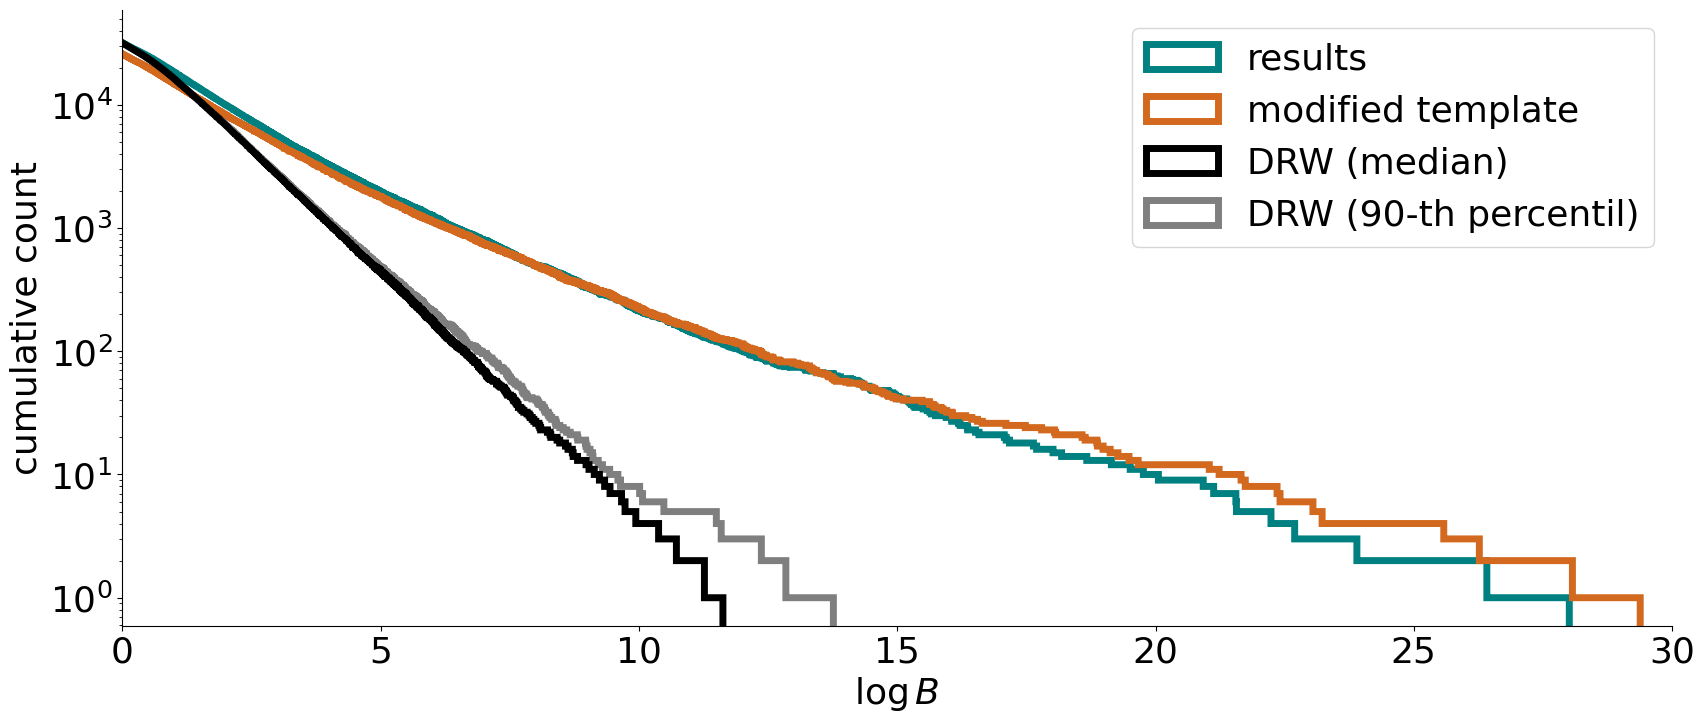

In [3]:
plt.figure(figsize= (20, 8))
ff = 26
plt.yticks(fontsize=ff)
plt.xticks(fontsize=ff)

istat = 1
stat = ['log_post_odds', 'logB', 'log_lik_ratio'][istat]
xlabel = [r'$\log \frac{P(H_1 \vert \mathrm{data})}{P(H_0 \vert \mathrm{data})}$', r'$\log B$', 'log-likelihood ratio'][istat]  
save_name = 'img/results' + ['_post_odds', '', '_loglik'][istat]  

X = [('results', 'teal', 1, np.array(data[stat]) ), 
     ('modified template', 'chocolate', 1, np.array(data1[stat]) ), 
     ('DRW (median)', 'black', 1, np.median(data_sim, axis= 0) ), 
     ('DRW (90-th percentil)', 'black', 0.5, data_sim[-1])]


for name, color, alpha, x in X:
    x  = x[np.isfinite(x)]
    plt.hist(x, cumulative= -1, histtype= 'step', bins = len(x), label= name, lw= 5, color = color, alpha= alpha)

plt.xlim(0, 30)
plt.legend(fontsize= ff)
plt.xlabel(xlabel, fontsize = ff)
plt.ylabel('cumulative count', fontsize= ff)
plt.yscale('log')
plt.savefig(save_name)
plt.show()

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


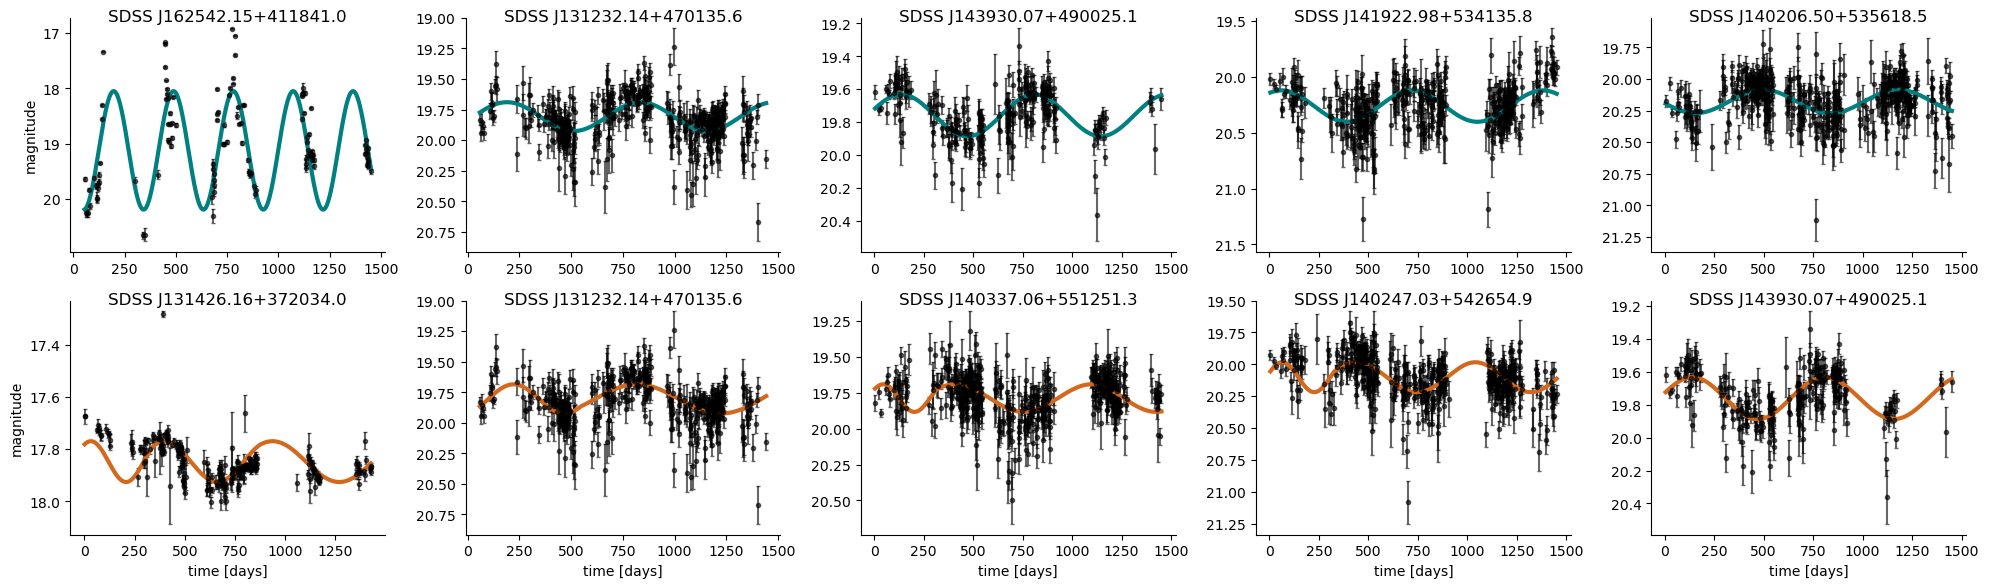

In [4]:
import jax
import jax.numpy as jnp

jax.config.update('jax_platform_name', 'cpu')
jax.config.update("jax_enable_x64", True) # since we are on cpu we do not mind using 64 bits

from LombScargle import periodogram
from quasars.prep import load_data


def get_temp(temp_num, id):
    if temp_num == 0:
        return periodogram.basic
    else:
        job_id = jnp.argmin(jnp.abs(ids - id))
        key= jax.random.split(jax.random.key(42), 10 * len(ids)).reshape(10, len(ids))[temp_num][job_id]
        return periodogram.randomized_period(key, 2000, spread= 3.)


def plot_fit(results, temp_num):

    amp = np.array(results[['A_const', 'A_sin', 'A_cos']])
    freq_best = 1./results['period']
    id = results['id']
    
    time, mag, mag_err, _ = load_data(id)
    t0 = 54903.
    quasar_names = {366226: 'SDSS J162542.15+411841.0', 263798: 'SDSS J131232.14+470135.6', 316958: 'SDSS J143930.07+490025.1', 304690: 'SDSS J141922.98+534135.8', 294564: 'SDSS J140206.50+535618.5', 264967: 'SDSS J131426.16+372034.0', 263798: 'SDSS J131232.14+470135.6', 295399: 'SDSS J140337.06+551251.3', 294940: 'SDSS J140247.03+542654.9', 316958: 'SDSS J143930.07+490025.1'}

    plt.title(quasar_names[id], y = 0.95)
    plt.errorbar(time-t0, mag, mag_err, fmt = '.', capsize = 1.3, alpha = 0.6, color= 'black', label= 'data')
    t = jnp.linspace(jnp.min(time), jnp.max(time), 1000)
    
    model = periodogram.fit(t, freq_best, amp, temp_func= get_temp(temp_num, id))
    plt.plot(t-t0, model, color = ['teal', 'chocolate', 'chocolate'][temp_num], lw = 3, label= 'model')
    plt.gca().invert_yaxis()

plt.figure(figsize = (20, 6))
    
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plot_fit(data.iloc[i], temp_num= 0)
    if i == 0:
        plt.ylabel('magnitude')
    plt.subplot(2, 5, i + 6)
    plot_fit(data1.iloc[i], temp_num= 1)
    plt.xlabel('time [days]')
    if i == 0:
        plt.ylabel('magnitude')
    
plt.tight_layout()
plt.savefig('img/candidates.png')
plt.show()

In [4]:
info = pd.merge(info, data[['id', 'log_prior_odds']], on= 'id')

In [7]:
info.to_csv(dir_data + 'quasar_info.csv')

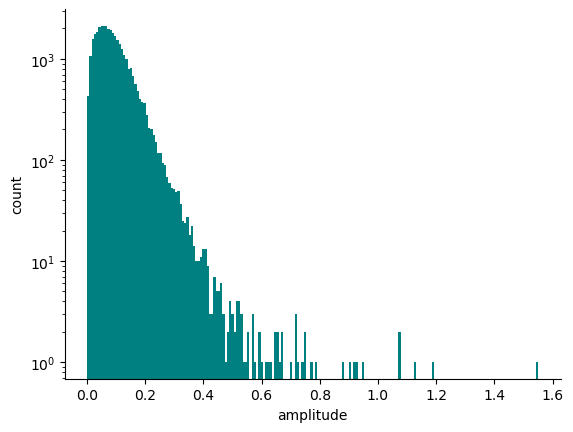

In [8]:
A = np.sqrt(np.square(data['A_cos']) + np.square(data['A_sin']))
plt.hist(A, bins = 200)
plt.yscale('log')
plt.xlabel('amplitude')
plt.ylabel('count')
plt.show()

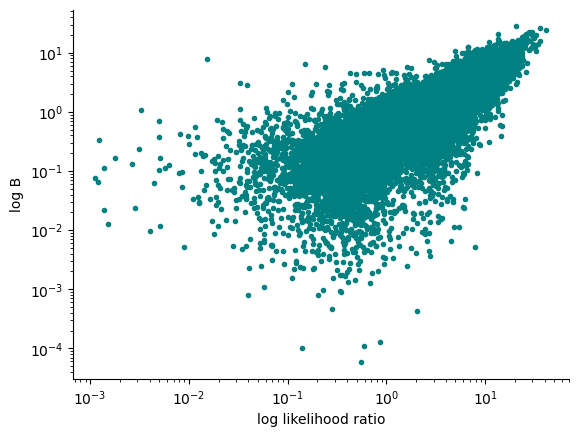

In [16]:
mask = np.isfinite(data['logB']) & (data['logB'] > 0.) #& (data['log_lik_ratio'] > 0.)
plt.plot(np.array(data['log_lik_ratio'])[mask], np.array(data['logB'])[mask], '.')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('log likelihood ratio')
#plt.xlim(1e-3, 100.)
plt.ylabel('log B')

plt.show()

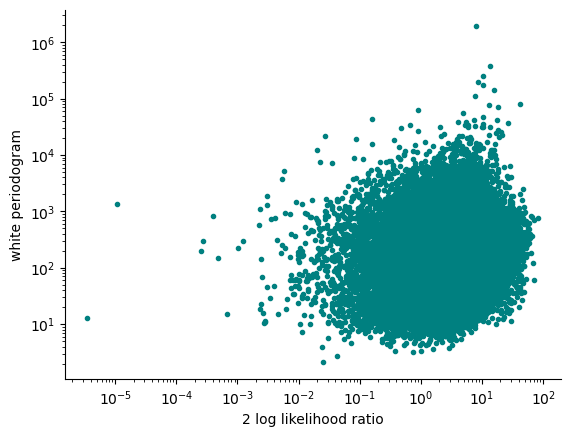

In [11]:
plt.plot(2 * np.array(data['log_lik_ratio']), np.array(data['white_periodogram']), '.')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('2 log likelihood ratio')
plt.ylabel('white periodogram')
plt.show()

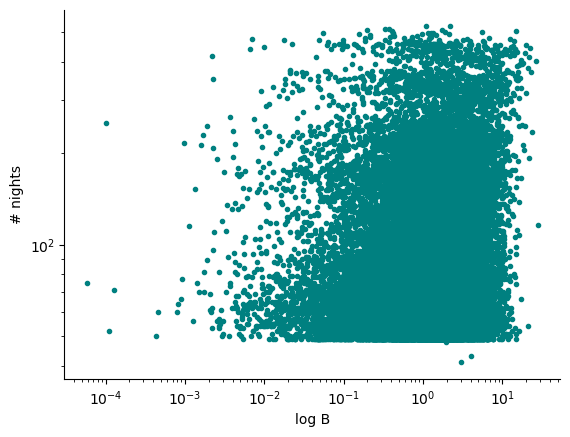

In [15]:
plt.plot(np.array(data['logB']), np.array(data['data_points']), '.')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('log B')
plt.ylabel('# nights')
plt.show()

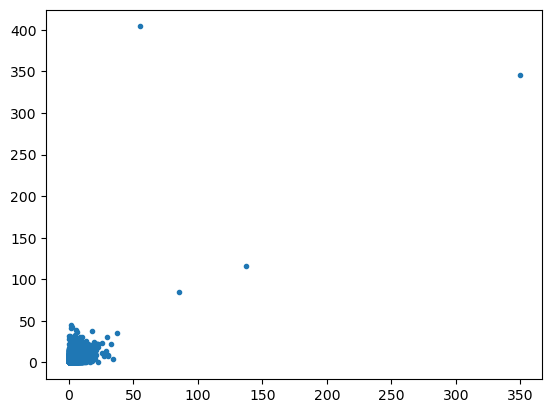

In [4]:
# are the same quasars detected on null and periodic?

data_both = data.merge(data2, on= 'id')
mask = np.isfinite(data_both['logB_x']) & np.isfinite(data_both['logB_y']) & (data_both['logB_x'] > 0) & (data_both['logB_y'] > 0)
plt.plot(np.array(data_both['logB_x'])[mask], np.array(data_both['logB_y'])[mask], '.')